In [1]:
from IPython.display import Image

Here I'll try and capture some of the maths I've been trying to do. INstead of having messy scribbles, I'll write it down neatly so in the ned I can refer back to it and not be like the gangesters lawyer in the Good Wife. 

The model is we take $O$ reference frame as the Eart who's $z$-axis lies up with the rotational axis of the Earth, but who's $x$ and $y$ axis are stationay relative to the solar system. Therefore the Sun has an `orbit' in a plane that is canted by an angle $\beta$ being the tilt of the Earth out of the Eclupit plane. This is 23.5$^{\circ}$.


We're working with 3D coordinate system. So before doing much else we need to be able to swap between cartesian $(x,y,z)$ and polar $(r,\theta,\phi)$ coordiinate systems. 


<img src="xyz.jpg" width="300">



Which gives the following coordinate transforms
\begin{align}
x &= r \sin \theta \cos \phi \\
y&= r \sin \theta \sin \phi \\
z &= r \cos \theta
\end{align}
and in reverse
\begin{align}
r &= \sqrt{x^2+y^2+z^2}\\
\phi &= \arctan \left( \frac{y}{x} \right) \\
\theta &= \arccos \left( \frac{z}{\sqrt{x^2+y^2+z^2}}\right)
\end{align}
We therefore have the following things to consider. That the Sun is in effect orbiting the Earth but at a tilt of $\beta$. 
<img src="sun_tilt_2.jpg" width="500">

Let's all this the $0'$ reference fram. In that reference frame the Sun's coordinates are simple,
\begin{align}
r' &= 1 \\
\theta' &= 90 \\
\phi' &= \omega t
\end{align}
where we can work out the angular velocity and time later when we need to. The key is, how can we map these to the Earth's $0$ frame of reference? 

So we can write that
\begin{align}
x' &= \cos (\omega t)\\
y' &= \sin(\omega t) \\
z' &= 0
\end{align}
To convert from $O'$ to $O$ my brain can only do it in cartesian. 

In terms of unit vectors let's look along the $$ (and $y'$) axes and work out how to convert a unit vector in $O'$ to $O$. 
<img src="sun_tilt_3.jpg" width="300">

From this we can see that
\begin{align}
\hat{x}' &= \hat{x} \cos \beta - \hat{z} \sin \beta \\
\hat{y}' &= \hat{y} \\
\hat{z}' &= \hat{x} \sin \beta + \hat{z} \cos \beta
\end{align}
and so we can get the reverse
\begin{align}
\hat{x} &= \hat{x}' \cos \beta + \hat{z}' \sin \beta \\
\hat{y} &= \hat{y}' \\
\hat{z} &= -\hat{x}' \sin \beta + \hat{z}' \cos \beta
\end{align}

So now we need to convert the time-dependant $x'$ and $y'$ and $z'$ coordiates to time dependant $x$, $y$ and $z$ coordinates and from there to time dependent $r$, $\theta$ and $\phi$. I wish I was more brainy as I'm sure there are easier ways of doing this. Oh well. Taking the time dependence in the $O'$ frame and the unit conversions above we have
\begin{align}
x &= \cos (\omega t) \cos \beta \\
y &= \sin (\omega t) \\
z &= -\cos (\omega t) \sin \beta = \cos (\omega t) \sin (-\beta)
\end{align}
which we can then use to convert to polar (only care about angular) coordinates for $O$
\begin{align}
\theta &= \arccos \left[ \cos (\omega t)\sin (-\beta) \right] \\
\phi &= \arctan \left[ \tan(\omega t) \cos \beta  \right]
\end{align}
Therefore for a year these should be something like the Sun's coordinates.

In [2]:
#This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt



In [3]:
time = np.arange(0,365,1/(24))

In [4]:
beta = 23.5
#beta = 90
beta_rad = beta * (2*np.pi / 360)
omega = 2*np.pi / 365

Note, to get the right form of $\arccos$ we'll compute the $x$ and $y$ and $z$ values then use the arctan2 command. This will get the quadrant right.

In [5]:
xSun = np.cos(omega*time)*np.cos(beta_rad)
ySun = np.sin(omega*time)
zSun = np.cos(omega*time) * np.sin(-1*beta_rad)
rSun = np.square(xSun) + np.square(ySun) + np.square(zSun)

In [6]:
theta = np.arccos(zSun)
phi = np.arctan2(ySun,xSun)

#arctan2 runs from -pi to +pi, so have to fix for my coordinate system.
for i in range(len(phi)):
    if phi[i] < 0:
        phi[i] = phi[i] + 2*np.pi


Text(0.5, 0, 'Time / Days')

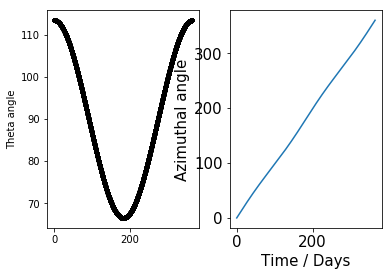

In [7]:
ax1 = plt.subplot(1,2,1) 
#plt.rcParams["figure.figsize"] =(2,8)

plt.rcParams.update({'font.size':15}) 

ax1.plot(time, theta*(360/(2*np.pi)), 'k.', ls='None', label='Theta')
plt.ylabel('Theta angle')


ax2 = plt.subplot(1,2,2)
ax2.plot(time, phi*(360/(2*np.pi)), ls='-', label='phi')
plt.ylabel('Azimuthal angle')
plt.rcParams.update({'font.size':15}) 


plt.xlabel('Time / Days')




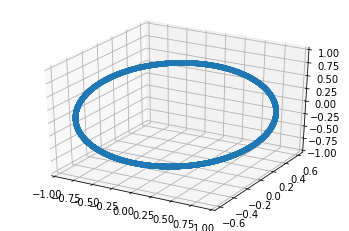

In [8]:
#%matplotlib qt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xSun, ySun, zSun)
ax.axis('equal')
ax.set(xlim=(-1, 1), ylim=(-1,1), zlim=(-1,1))

plt.show()

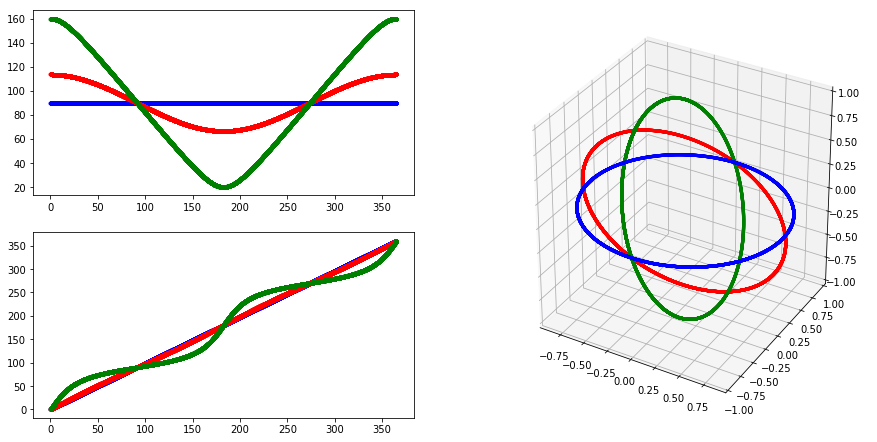

In [9]:
betas = [0,23.5,70]

plt.rcParams['figure.figsize'] = [15, 7.5]

ax1 = plt.subplot(2,2,1) 
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(1,2,2, projection='3d')
plt.rcParams["figure.figsize"] =(18,9)

c = ['b','r','g']


for j in range(len(betas)):
    beta = betas[j]
    beta_rad = beta * (2*np.pi / 360)
    omega = 2*np.pi / 365
    xSun = np.cos(omega*time)*np.cos(beta_rad)
    ySun = np.sin(omega*time)
    zSun = np.cos(omega*time) * np.sin(-1*beta_rad)
    rSun = np.square(xSun) + np.square(ySun) + np.square(zSun)
    theta = np.arccos(zSun)
    phi = np.arctan2(ySun,xSun)

#arctan2 runs from -pi to +pi, so have to fix for my coordinate system.
    for i in range(len(phi)):
        if phi[i] < 0:
            phi[i] = phi[i] + 2*np.pi

    ax1.plot(time, theta*(360/(2*np.pi)), color=c[j], marker='.',ls='None', label='Theta')
    ax2.plot(time, phi*(360/(2*np.pi)), color=c[j], marker='.',ls='-', label='phi')

    ax3.scatter(xSun, ySun, zSun,color=c[j], marker='.')
    ax3.axis('equal')
    ax3.set(xlim=(-1, 1), ylim=(-1,1), zlim=(-1,1))

#plt.show()

Time. We need to consider the two types of time. Sidereal time and solar time. The reference fram we're using uses sidereal time (as it has stellar angles) yet to be useful we need to consider the solar time on Earth so we can use days and the normal calender to work things out. Hence we need to have the angular velocity of the Earth and Sun in terms of solar days. But what we know and can easily write down is to do with sidereal time. So we'll do that then convert.

Beacuse of the motion of the Earth and it's spinning it takes 366 sidereal days to complete an orbit of the Sun and only 365 solar days.

<img src="siderealday1.jpg" width="300">
(Image from http://astronomy.swin.edu.au/cosmos/S/Sidereal+Day)

Therefore for the Sun's angular velocity in 365 solar days it does $2\pi$ radians, $365 \times \omega_s = 2\pi$ giving us 
\begin{equation}
\omega_s = \frac{2\pi}{365}
\end{equation}
In that same time the Earth has rotated 366 times in the reference frame, so $365 \times \omega_E = 366 \times 2\pi$ giving us
\begin{equation}
\omega_E = 2\pi\frac{366}{365}
\end{equation}
So now all out times are in Solar days. Of course this doesn't take into account many other subleties like leap seconds etc. But oh well this is just for fun. 

In [10]:
omega_E = 2 * np.pi *366 / 365
omega_S = 2 * np.pi / 365

The varible "time" is in solar days from 0 to 365 in 1 min steps.

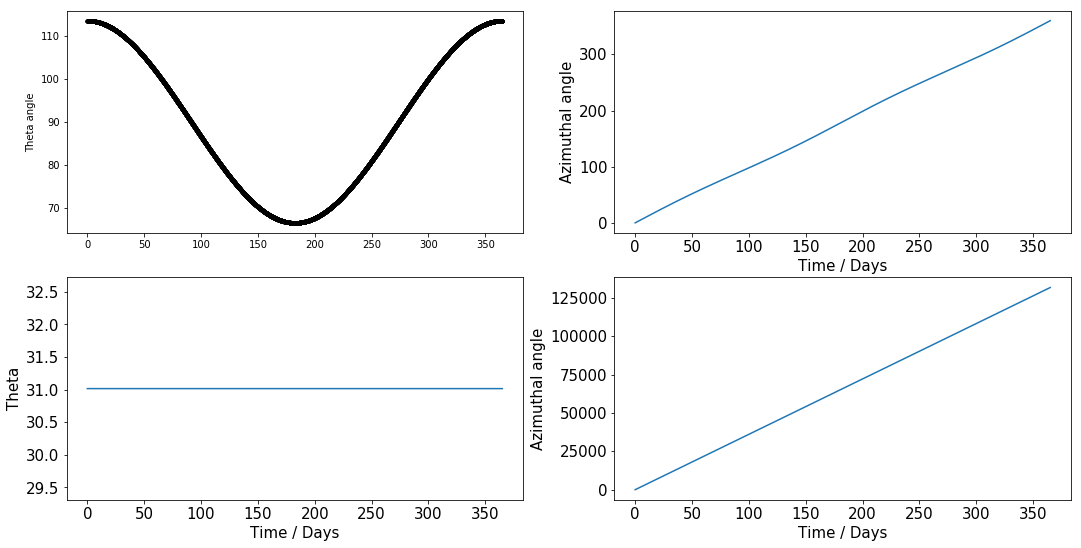

In [11]:
#Orkney's latitude.
LatN = 58.9847
#But we need in angular terms of our coordinate syste, so
Theta_E = 90-LatN
Theta_E_rad  = Theta_E  * (2*np.pi / 360)

# tilt of sun's orbit (Earth's axis)
beta = 23.5
#beta = 88
beta_rad = beta * (2*np.pi / 360)

xSun = np.cos(omega_S*time)*np.cos(beta_rad)
ySun = np.sin(omega_S*time)
zSun = np.cos(omega_S*time) * np.sin(-1*beta_rad)
thetaSun = np.arccos(zSun)
phiSun = np.arctan2(ySun,xSun)

#arctan2 runs from -pi to +pi, so have to fix for my coordinate system.
for i in range(len(phiSun)):
    if phiSun[i] < 0:
        phiSun[i] = phiSun[i] + 2*np.pi

#coordinates for point on Earth
        
thetaEarth = (time-time) + Theta_E_rad
phiEarth = omega_E * time
xEarth = np.sin(thetaEarth) * np.cos(phiEarth)
yEarth = np.sin(thetaEarth) * np.sin(phiEarth)
zEarth = np.cos(thetaEarth)
 
        
ax1 = plt.subplot(2,2,1) 
#plt.rcParams["figure.figsize"] =(2,8)

plt.rcParams.update({'font.size':15}) 

ax1.plot(time, thetaSun*(360/(2*np.pi)), 'k.', ls='None', label='Theta')
plt.ylabel('Theta angle')


ax2 = plt.subplot(2,2,2)
ax2.plot(time, phiSun*(360/(2*np.pi)), ls='-', label='phi')
plt.ylabel('Azimuthal angle')
plt.rcParams.update({'font.size':15}) 
plt.xlabel('Time / Days')


ax3=plt.subplot(2,2,3)
ax3.plot(time, thetaEarth*(360/(2*np.pi)), ls='-', label='phi')
plt.ylabel('Theta')
plt.rcParams.update({'font.size':15}) 
plt.xlabel('Time / Days')

ax4 = plt.subplot(2,2,4)
ax4.plot(time, phiEarth*(360/(2*np.pi)), ls='-', label='phi')
plt.ylabel('Azimuthal angle')
plt.rcParams.update({'font.size':15}) 
plt.xlabel('Time / Days')

plt.show()

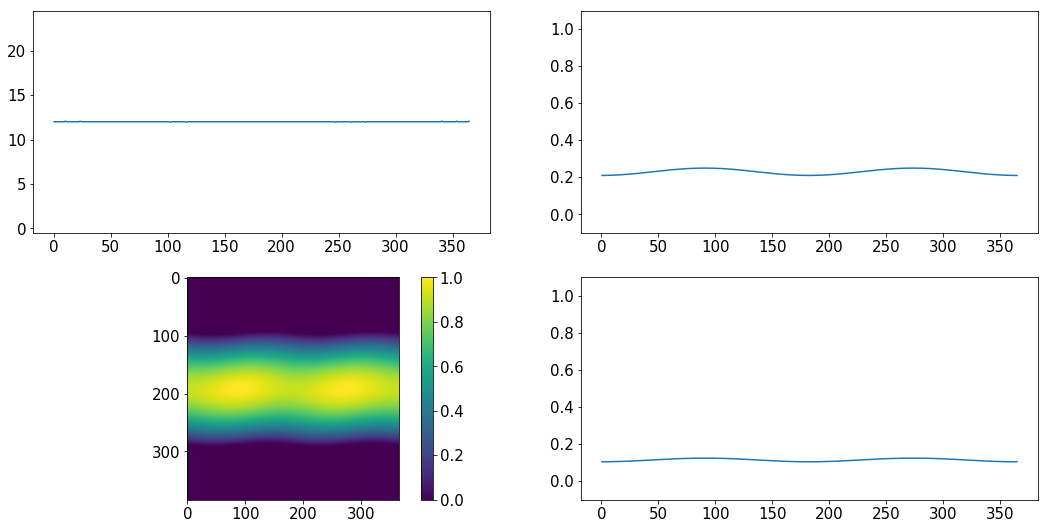

In [12]:
# Pcik a day,

#Go over days.
Days = np.arange(0.5,365.5,1)
time = np.arange(0,1,1/(24*16))
daylight = np.zeros( (len(Days),len(time)) )

DayLightHRS = np.zeros(len(Days))
Intensity = np.zeros(len(Days))

from array2gif import write_gif

for D in range(len(Days)):
    time2 = time + Days[D]
    
    #Orkney's latitude.
    LatN = 58.9847
    LatN = 0 # Bath
    #But we need in angular terms of our coordinate syste, so
    Theta_E = 90-LatN
    Theta_E_rad  = Theta_E  * (2*np.pi / 360)

    # tilt of sun's orbit (Earth's axis)
    beta = 23.5
    #beta = 4
    beta_rad = beta * (2*np.pi / 360)

    xSun = np.cos(omega_S*time2)*np.cos(beta_rad)
    ySun = np.sin(omega_S*time2)
    zSun = np.cos(omega_S*time2) * np.sin(-1*beta_rad)
    thetaSun = np.arccos(zSun)
    phiSun = np.arctan2(ySun,xSun)
    

    #arctan2 runs from -pi to +pi, so have to fix for my coordinate system.
    for i in range(len(phiSun)):
        if phiSun[i] < 0:
            phiSun[i] = phiSun[i] + 2*np.pi

    #coordinates for point on Earth

    thetaEarth = (time2-time2) + Theta_E_rad
    phiEarth = omega_E * time2
    xEarth = np.sin(thetaEarth) * np.cos(phiEarth)
    yEarth = np.sin(thetaEarth) * np.sin(phiEarth)
    zEarth = np.cos(thetaEarth)




    # Now let's work out the dot product of the sun and earth vector? Let's do this with the x and y and z coordinates.

    Sun_dot_Earth = 0 * xSun

    for i in range(len(phiSun)):
        Sun_dot_Earth[i] = xSun[i] * xEarth[i] + ySun[i] * yEarth[i] + zSun[i] * zEarth[i] 
        
        if Sun_dot_Earth[i] > 0:
            #sun is up
            DayLightHRS[D] = DayLightHRS[D] + 24/len(time)
            Intensity[D] = Intensity[D] + Sun_dot_Earth[i]*Sun_dot_Earth[i]/len(time)
        
        if Sun_dot_Earth[i] < 0:
            Sun_dot_Earth[i] = 0
            

    daylight[D,:] = Sun_dot_Earth[:]
    
  
ax1 = plt.subplot(2,2,3)
ax1 = plt.imshow(daylight.transpose(), interpolation='bilinear',vmin = 0, vmax = 1)
#cax = plt.add_axes([0.1,.1,.5,.1])
#plt.colorbar(ax1, cax=cax,orientation = 'horizontal')
plt.colorbar()

ax2 = plt.subplot(2,2,1)
ax2 = plt.plot(Days,DayLightHRS, ls='-')
plt.ylim(-0.5,24.5)

ax3 = plt.subplot(2,2,2)
ax3 = plt.plot(Days,Intensity, ls='-')
plt.ylim(-0.1,1.1)

ax4 = plt.subplot(2,2,4)
ax4 = plt.plot(Days,Intensity * DayLightHRS/24, ls='-')
plt.ylim(-0.1,1.1)
plt.show()


In [119]:
#Same code as above, but now run over all latidudes but here without showing them.

#Go over days.
Days = np.arange(0.5,365.5,1)
time = np.arange(0,1,1/(24*16))
Lats = np.arange(-90,90,2)
#It doesn't do 90 to put that in by hand
Lats2 = np.append(Lats, 90)



print(Lats.shape)

daylightL = np.zeros( (len(Days),len(time),len(Lats)) )

DayLightHRSL = np.zeros( (len(Days),len(Lats)) )
IntensityL = np.zeros( (len(Days),len(Lats)) )


print(daylightL.shape)

(90,)
(365, 384, 90)


In [120]:
for L in range(len(Lats)):
    LatN = Lats[L]
    
    DayLightHRS = np.zeros(len(Days))
    Intensity = np.zeros(len(Days))
    
    for D in range(len(Days)):
        time2 = time + Days[D]

        #Orkney's latitude.
        #LatN = 58.9847
        #LatN = 0 # Bath
        #But we need in angular terms of our coordinate syste, so
        Theta_E = 90-LatN
        Theta_E_rad  = Theta_E  * (2*np.pi / 360)

        # tilt of sun's orbit (Earth's axis)
        beta = 23.5
        #beta = 4
        beta_rad = beta * (2*np.pi / 360)

        xSun = np.cos(omega_S*time2)*np.cos(beta_rad)
        ySun = np.sin(omega_S*time2)
        zSun = np.cos(omega_S*time2) * np.sin(-1*beta_rad)
        thetaSun = np.arccos(zSun)
        phiSun = np.arctan2(ySun,xSun)


        #arctan2 runs from -pi to +pi, so have to fix for my coordinate system.
        for i in range(len(phiSun)):
            if phiSun[i] < 0:
                phiSun[i] = phiSun[i] + 2*np.pi

        #coordinates for point on Earth

        thetaEarth = (time2-time2) + Theta_E_rad
        phiEarth = omega_E * time2
        xEarth = np.sin(thetaEarth) * np.cos(phiEarth)
        yEarth = np.sin(thetaEarth) * np.sin(phiEarth)
        zEarth = np.cos(thetaEarth)




        # Now let's work out the dot product of the sun and earth vector? Let's do this with the x and y and z coordinates.

        Sun_dot_Earth = 0 * xSun

        for i in range(len(phiSun)):
            Sun_dot_Earth[i] = xSun[i] * xEarth[i] + ySun[i] * yEarth[i] + zSun[i] * zEarth[i] 

            if Sun_dot_Earth[i] > 0:
                #sun is up
                DayLightHRS[D] = DayLightHRS[D] + 24/len(time)
                Intensity[D] = Intensity[D] + Sun_dot_Earth[i]*Sun_dot_Earth[i]/len(time)

            if Sun_dot_Earth[i] < 0:
                Sun_dot_Earth[i] = 0


        daylightL[D,:,L] = Sun_dot_Earth[:]
        DayLightHRSL[:,L] = DayLightHRS[:]
        IntensityL[:,L] = Intensity[:]





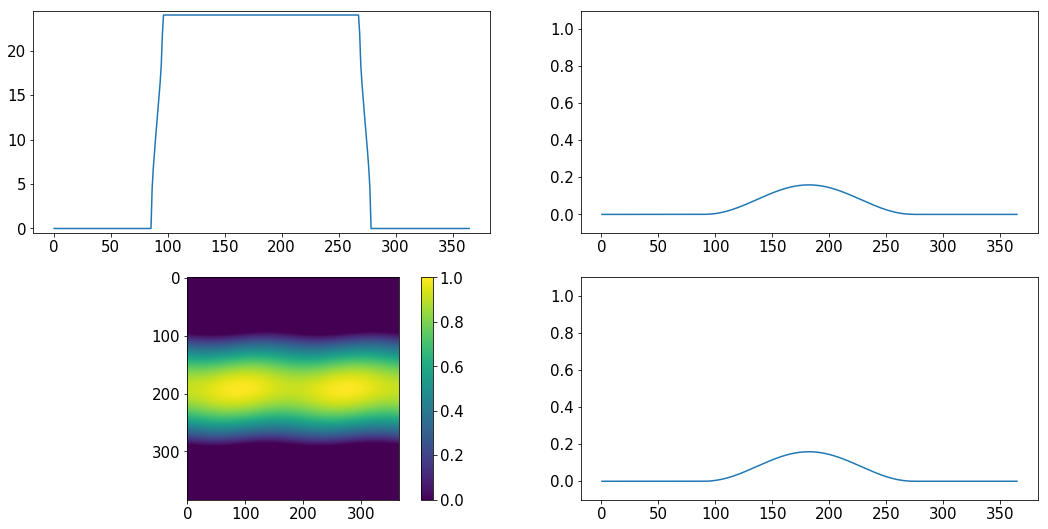

In [121]:
    ax1 = plt.subplot(2,2,3)
    ax1 = plt.imshow(daylight.transpose(), interpolation='bilinear',vmin = 0, vmax = 1)
    #cax = plt.add_axes([0.1,.1,.5,.1])
    #plt.colorbar(ax1, cax=cax,orientation = 'horizontal')
    plt.colorbar()

    ax2 = plt.subplot(2,2,1)
    ax2 = plt.plot(Days,DayLightHRS, ls='-')
    plt.ylim(-0.5,24.5)

    ax3 = plt.subplot(2,2,2)
    ax3 = plt.plot(Days,Intensity, ls='-')
    plt.ylim(-0.1,1.1)

    ax4 = plt.subplot(2,2,4)
    ax4 = plt.plot(Days,Intensity * DayLightHRS/24, ls='-')
    plt.ylim(-0.1,1.1)
    plt.show()

In [122]:
from IPython.display import display, clear_output

print(np.amax(IntensityL))

0.27951282735878835


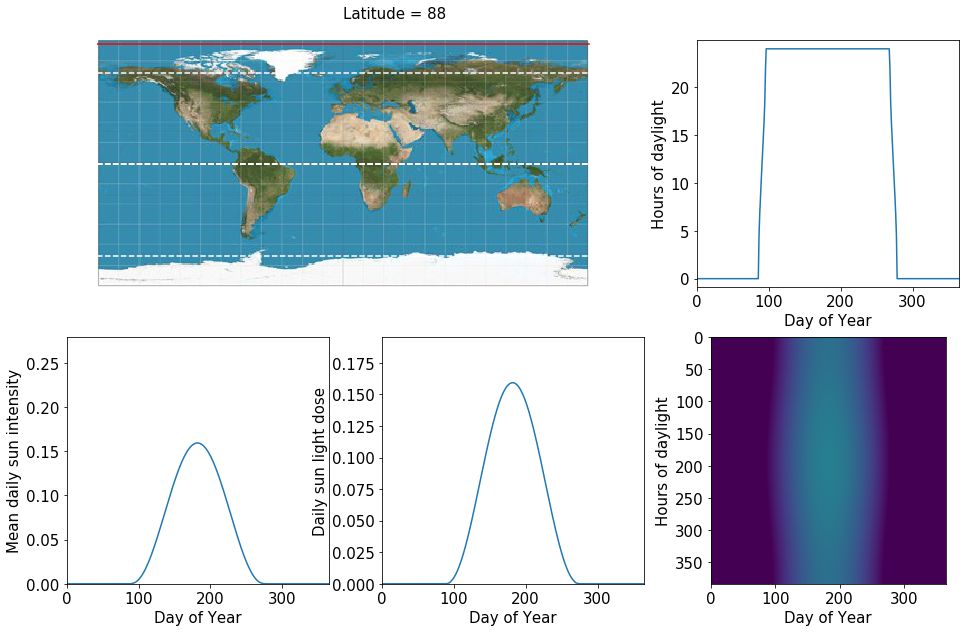

In [123]:
fig = plt.figure(figsize=(16,10))
ax2 = fig.add_subplot(2, 3, 3) 

ax3 = fig.add_subplot(2, 3, 4) 

ax4 = fig.add_subplot(2, 3, 5)

ax1 = fig.add_subplot(2,3,6)
plt.ylabel('Hours of daylight')

ax5 = fig.add_subplot(2,3,(1,2))
im = plt.imread("Equirectangular_projection_400.jpg")
A = im.shape


doseL = IntensityL*0
for L in range(len(Lats)):    

    doseL[:,L] = IntensityL[:,L] * DayLightHRSL[:,L]/24




for L in range(len(Lats)):    
#for L in range(1):    

    ax2.cla()
    ax2.plot(Days,DayLightHRSL[:,L], ls='-')
    ax2.set_xlim(0, 365)
    ax2.set_ylim(-0.9, 24.9)
    ax2.set_ylabel('Hours of daylight')
    ax2.set_xlabel('Day of Year')
   # ax2.axis('equal')

 
    ax3.cla()
    ax3.plot(Days,IntensityL[:,L], ls='-')
    ax3.set_xlim(0, 365)
    ax3.set_ylim(0, np.amax(IntensityL))
    ax3.set_ylabel('Mean daily sun intensity')
    ax3.set_xlabel('Day of Year')

    
    ax4.cla()
    ax4.plot(Days,doseL[:,L], ls='-')
    ax4.set_xlim(0, 365)
    ax4.set_ylim(0, np.amax(doseL))
    ax4.set_ylabel('Daily sun light dose')
    ax4.set_xlabel('Day of Year')


    ax1.imshow(daylightL[:,:,L].transpose(), interpolation='bilinear',vmin = 0, vmax = 1)
    ax1.set_xlabel('Day of Year')

    
    ax5.cla()
    ax5.imshow(im)
    ax5.axis('off')

    pix = (90-Lats[L])*A[0]/180 
    ax5.plot([0,A[1]],[pix,pix],'-r')
    ax5.text(A[1]/2,-20,'Latitude = ' + str(Lats[L]))
    
    pix = (90-0)*A[0]/180 
    ax5.plot([0,A[1]],[pix,pix],'--w')
    
    pix = (90-66.5)*A[0]/180 
    ax5.plot([0,A[1]],[pix,pix],'--w')
    
    pix = (90+66.5)*A[0]/180 
    ax5.plot([0,A[1]],[pix,pix],'--w')
    
    pix = (90-0)*A[0]/180 
    ax5.plot([0,A[1]],[pix,pix],'--w')
    
    pix = (90-0)*A[0]/180 
    ax5.plot([0,A[1]],[pix,pix],'--w')
    
    
    display(fig)
    clear_output(wait = True)
    plt.pause(0.1)

Lats is from $-90$ to $90$. Need to convert to pixels for nice world plot below. $-90$ will be A[0], 0 will be A[0]/2 and $+90$ will be 0. So A[1]/180. Then 

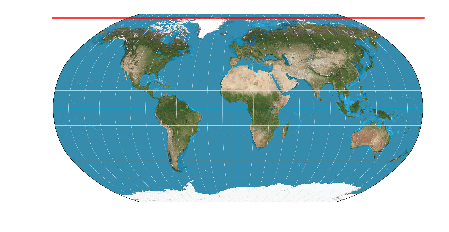

In [76]:
fig = plt.figure(figsize=(7,7))
ax2 = fig.add_subplot(1, 1, 1) 
im = plt.imread("Robinson.jpg")
A = im.shape

for L in range(len(Lats)): 
    ax2.cla()
    ax2.imshow(im)
    ax2.axis('off')

    pix = (90-Lats[L])*A[0]/180 
    ax2.plot([0,A[1]],[pix,pix],'-r')

    plt.show()
    display(fig)
    clear_output(wait = True)
    plt.pause(0.1)

In [106]:
print(Lats)

[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]


In [111]:
Lats2 = np.append(Lats, 90)
print(Lats2)

[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90]
